In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os, sys, time

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

print(tf.__version__)
print(sys.version_info)

2.0.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[: 5000], x_train_all[5000: ]
y_valid, y_train = y_train_all[: 5000], y_train_all[5000: ]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


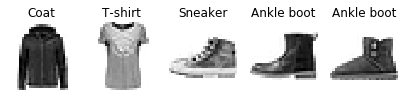

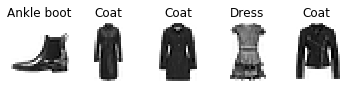

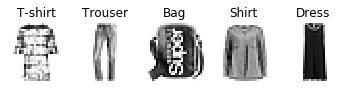

In [3]:
def show_single_image(image_arr):
    plt.imshow(image_arr, cmap="binary")


def show_multiple_images(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)

    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = row * n_cols + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_data[index]])
        plt.show()


class_names = ['T-shirt', 'Trouser',  'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_multiple_images(3, 5, x_train, y_train, class_names)

#### selu
selu: 带有归一化的relu。类似BatchNorm的作用，此例中selu更好一些。

#### AlphaDropout
AlphaDropout:  更复杂的dropout实现，
- 均值方差不变，
- 归一化性质也不变。  

同时一般在最后几层添加dropout

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(300, activation='selu'))
# model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='selu'))
model.add(keras.layers.AlphaDropout(rate=0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

# y -> should be one-hot vector
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# model.layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
alpha_dropout (AlphaDropout) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
logdir = '.\callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, 'fashion_mnist_model.h5')

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), 
                    callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 138us/sample - loss: nan - accuracy: 0.1007 - val_loss: nan - val_accuracy: 0.0914
Epoch 2/10
 1408/55000 [..............................] - ETA: 6s - loss: nan - accuracy: 0.1001

d:\programdata\envs\tf2\lib\site-packages\tensorflow_core\python\keras\callbacks.py:992: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):
d:\programdata\envs\tf2\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


55000/55000 [==============================] - 6s 105us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 3/10
55000/55000 [==============================] - 6s 107us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 4/10
55000/55000 [==============================] - 6s 107us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 5/10
55000/55000 [==============================] - 6s 105us/sample - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914


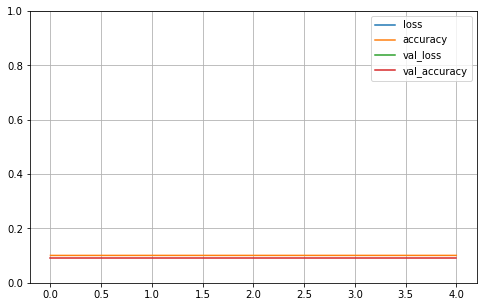

In [6]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curve(history)